# __Лінійна регресія (Навчання з учителем)__

`(власні функції)`

`Housing.csv`<br>
Знайдіть найкращі параметри w⃗ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень.
<br><br>


Лінійна регресія з однією змінною (`h`)
<br>
`h(x) = w_0 + w_1 * x`  #  залежність від одного параметру `x`, і `x_0 = 1`
<br><br>
Лінійна регресія з багатьма змінними (`h` = `linear_regression_hypothesis`)
<br>
`h(x) = w⋅x`  # залежність від багатьох параметрів `x_1...x_n`, і `x_0 = 1`.

In [5]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
def set_seed(seed_value: int) -> None:
    """Set a random state for repeatability of results."""
    random.seed(seed_value)
    np.random.seed(seed_value)
    # tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    os.environ['TF_DETERMINISTIC_OPS'] = 'true'
    

set_seed(1)

### __`OBTAIN` & `SCRUB`__ + __`EXPLORE`__ (DATASET)

In [7]:
# prepare data
full_df = pd.read_csv('Housing.csv')
full_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


- df = full_df
- df.price = y = df[0]
- df.area = x_1 = df[1]
- df.bedrooms = x_2 = df[2]
- df.bathrooms = x_3 = df[3]
- df.stories = x_4 = df[4]
- df.parking = x_5 = df[10]

In [8]:
# prepare df:
new_df = full_df.iloc[:, 0:4]
new_df.head(3)

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2


In [9]:
# prepare x (for example)
x = pd.DataFrame()
x[0] = np.ones((full_df.shape[0],), dtype=int)
for num in range(1, new_df.shape[1]):
    x[num] = full_df.iloc[:, num]

x.head(3)

,0,1,2,3
0,1,7420,4,2
1,1,8960,4,4
2,1,9960,3,2


In [10]:
def normalization(data) -> list:
    """Return normalized values (list) of the array_like object (data)."""
    mean: float = np.mean(data)
    value_range = np.max(data) - np.min(data)

    return [(x - mean) / value_range for x in data]

In [11]:
new_df = pd.DataFrame()
new_df['price'] = normalization(full_df.price)
new_df['area'] = normalization(full_df.area)
new_df['bedrooms'] = normalization(full_df.bedrooms)
new_df['bathrooms'] = normalization(full_df.bathrooms)
new_df.head(3)

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920


In [12]:
# prepare normalized x, (x_0 = 1)
x = pd.DataFrame()
x[0] = np.ones((new_df.shape[0],), dtype=int)
for num in range(1, new_df.shape[1]):
    x[num] = new_df.iloc[:, num]

x.head(3)

,0,1,2,3
0,1,0.155977,0.206972,0.237920
1,1,0.261818,0.206972,0.904587
2,1,0.330547,0.006972,0.237920


In [13]:
def x_prepare(w, x):
    """Prepare matrix x, add x[0]=1 to x."""
    return [x if i != 0 else 1.0 for i in range(len(w))]


### __`MODEL`__

Лінійна регресія:

In [14]:
def linear_regression_hypothesis(w: np.array, x: np.array) -> float:
    """
    Return the value of the linear regression hypothesis of dependence on many parameters.
    w: weights;
    x: parameters, where x[0] = 1.
    """
    if len(w) != len(x) or x[0] != 1:
        return None
    
    return np.dot(w, x)

Функція для обчислення функції втрат у векторному вигляді (`loss_function_many`):

In [15]:
def loss_function_many(w: np.array, df: pd.DataFrame, x: pd.DataFrame) -> float:
    """Calculation of the loss function in vector form (for dependence on many parameters).
    w: weights;
    df: DataFrame, where 0-column is y, last each one - important parameters;
    x: DataFrame of parameters where 0 column is 1 (x[0]=1).
    """
    if len(w) != x.shape[1]:
        return None
    
    # n: int = df.shape[1]
    m: int = df.shape[0]
        
    cost = 0
    for line_idx_y, y in enumerate(df.iloc[:, 0]):
        cost += (y - linear_regression_hypothesis(w, x.iloc[line_idx_y])) ** 2

    return cost/(2*m)

#### __`Training`__

Один крок градієнтного спуску:

In [16]:
def grad_step_many(weights: list, grads: list, learning_rate: float = 0.001) -> list:
    """Function of one step of gradient descent with many parameters. Return the weights (list)."""
    weights = [weights[num] - learning_rate * grads[num] for num in range(len(weights))]
    
    return weights

In [17]:
def grad_w_i(weights: list, df: pd.DataFrame, x: pd.DataFrame, i: int) -> float:
    """Calculation of the graduation descent weight 1 (for dependence on one parameter).
    weights is list of values from vector weights;
    df: DataFrame;
    x: DataFrame of parameters where 0 column is 1 (x[0]=1);
    i: number of i-parameter in x.
    """
    n: int = df.shape[0]
    cost = 0

    for line_idx_y, y in enumerate(df.iloc[:, 0]):
        cost += (linear_regression_hypothesis(weights, x.iloc[line_idx_y]) - y) * x.iloc[line_idx_y, i]

    return cost/n

In [18]:
def grad_descent(
                 weights: list, 
                 df: pd.DataFrame, 
                 num_iter: int, 
                 learning_rate: float = 0.001, 
                 epsilon: float = 0.0000001
                 ) -> tuple:
    """Gradient descent function with one parameter. Return weights and story of the descent."""
    loss_history = [loss_function_many(weights, df, x)]
    for _ in range(num_iter):
        grads = [grad_w_i(weights, df, x, el) for el in range(x.shape[1])]
        weights = grad_step_many(weights, grads, learning_rate=learning_rate)

        loss = loss_function_many(weights, df, x)
        loss_history.append(loss)

        if abs(loss - loss_history[-2]) < epsilon:
            break

    return (weights, loss_history)

In [19]:
weights = [0. for _ in range(x.shape[1])]
weights, history = grad_descent(weights, df=new_df, num_iter=1000, learning_rate=0.001)
print(weights, '\n', history[0:2], history[-3:])

[1.9014962896804754e-17, 0.01273294983195144, 0.008566092610210577, 0.013747868423366165] 
 [0.013088679029173688, 0.01308823923171806] [0.012664950630071984, 0.01266454094041069, 0.012664131279840863]


In [20]:
weights = [0. for _ in range(x.shape[1])]
weights, history = grad_descent(weights, df=new_df, num_iter=1000, learning_rate=0.1)
print(weights, '\n', history[0:2], history[-3:])

[4.930816203862724e-17, 0.4334673916275597, 0.18904886881067134, 0.3536652641284381] 
 [0.013088679029173688, 0.013044776677262018] [0.006735864317916006, 0.006735763968666831, 0.006735664105912874]


In [21]:
weights

[4.930816203862724e-17,
 0.4334673916275597,
 0.18904886881067134,
 0.3536652641284381]

### __`INTERPRET`__ / __`Error Analysis`__

In [22]:
def line_normalization(data, line) -> list:
    """Return normalized values (list) of the array_like object (data) by original data."""
    mean: float = np.mean(data)
    value_range = np.max(data) - np.min(data)

    return [(x - mean) / value_range for x in line] 

In [25]:
new_df.head()

,price,area,bedrooms,bathrooms
0,0.738811,0.155977,0.206972,0.237920
1,0.647902,0.261818,0.206972,0.904587
2,0.647902,0.330547,0.006972,0.237920
3,0.644872,0.161475,0.206972,0.237920
4,0.575175,0.155977,0.206972,-0.095413


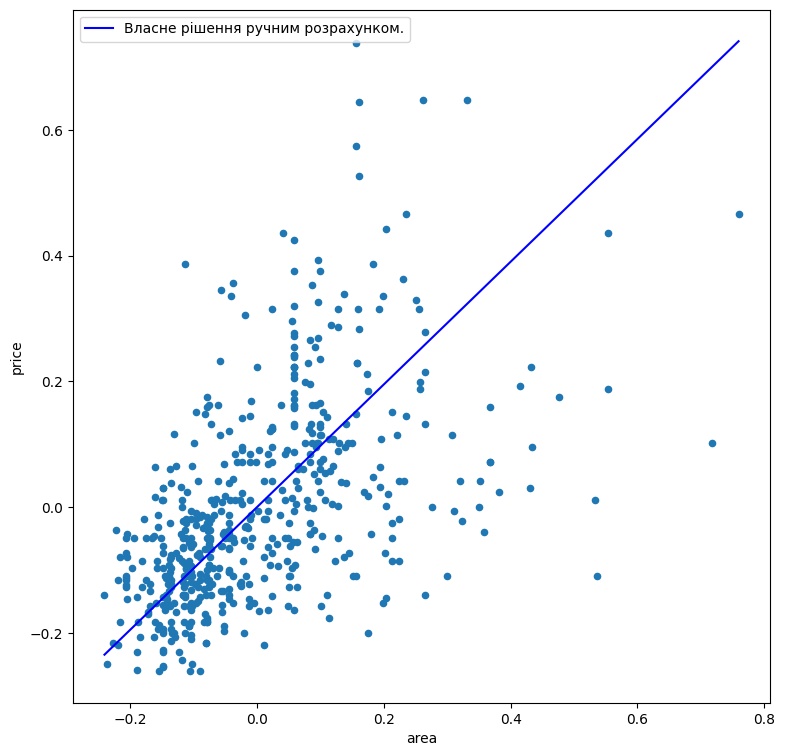

In [23]:
prep_df = pd.DataFrame()
prep_df['price'] = line_normalization(full_df.price, [0.2 * (10 ** 7), 0.8 * (10 ** 7)])
prep_df['area'] = line_normalization(full_df.area, [2000, 9000])

x = np.linspace(np.min(new_df.area), np.max(new_df.area), 3)
y1 = [linear_regression_hypothesis(weights, x_prepare(weights, xi)) for xi in x]

new_df.plot(x='area', y='price', kind='scatter', figsize=(9,9))

plt.plot(x, y1, label='Власне рішення ручним розрахунком.', color='blue')
plt.legend()
plt.show()